In [152]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


# Importing Data

In [153]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [154]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [155]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [156]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [157]:
train.isna().mean()

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [158]:
# Transported: True -> 1, False -> 0
train['Transported'] = train['Transported']*1  

In [159]:
train['HomePlanet'].count()

8492

In [160]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [161]:
def clean(df):
    inputer = KNNImputer(n_neighbors=2, weights='uniform')
    le = LabelEncoder()
    
    df['CryoSleep'] = df['CryoSleep']*1
    
    df[["Deck", "Cabin_num", "Side"]] = df['Cabin'].str.split('/', expand=True)
    
    #int miss value
    
    df[['Age', 'RoomService', 'FoodCourt', 
        'ShoppingMall', 'Spa', 'VRDeck',
        'CryoSleep', 'Cabin_num']] = inputer.fit_transform(df[[
        'Age', 'RoomService', 'FoodCourt',
        'ShoppingMall', 'Spa', 'VRDeck', 
        'CryoSleep', 'Cabin_num']])
    
    vals, nls = ['HomePlanet', 'Destination', 'Deck', 'Side'], ['Earth', 'TRAPPIST-1e', 'F', 'P']
    for i in range(len(vals)):
        df[vals[i]].fillna(nls[i], inplace=True)
        
    for j in ['HomePlanet', 'Destination', 'Deck', 'Side']:    
        df[j] = le.fit_transform(df[j].astype(str))
    
    return df

In [162]:
clean(train).head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side
0,0001_01,1,0.0,B/0/P,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,0.0,0
1,0002_01,0,0.0,F/0/S,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,5,0.0,1
2,0003_01,1,0.0,A/0/S,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,0.0,1
3,0003_02,1,0.0,A/0/S,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,0.0,1
4,0004_01,0,0.0,F/1/S,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,5,1.0,1


In [163]:
train = clean(train)
test = clean(test)

In [164]:
train.isna().mean()

PassengerId     0.000000
HomePlanet      0.000000
CryoSleep       0.000000
Cabin           0.022892
Destination     0.000000
Age             0.000000
VIP             0.023352
RoomService     0.000000
FoodCourt       0.000000
ShoppingMall    0.000000
Spa             0.000000
VRDeck          0.000000
Name            0.023007
Transported     0.000000
Deck            0.000000
Cabin_num       0.000000
Side            0.000000
dtype: float64

In [165]:
train.dtypes

PassengerId      object
HomePlanet        int64
CryoSleep       float64
Cabin            object
Destination       int64
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
Deck              int64
Cabin_num       float64
Side              int64
dtype: object

In [166]:
train['groupN'] = [
    int(i.split('_')[0]) 
    for i in train['PassengerId']  
]

In [167]:
(train['VIP'] == 1).mean()

0.02289198205452663

In [168]:
def sum_bills(df):
    scaler = StandardScaler()
    df['good_places'] = df[['FoodCourt', 'ShoppingMall']].sum(axis=1)/2
    df['terube_places'] = df[['RoomService', 'Spa', 'VRDeck']].sum(axis=1)/3
    return df


In [169]:
train = sum_bills(train)
test = sum_bills(test)

In [170]:
def road(df):
    le = LabelEncoder()
    res = []
    for ind, i in enumerate(df["HomePlanet"]):
        res.append(f'{i}-{df["Destination"][ind]}')
    
    df['road'] = res
    df['road'] = le.fit_transform(df['road'])
    return df

In [171]:
train = road(train)
test = road(test)

In [172]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,Deck,Cabin_num,Side,groupN,good_places,terube_places,road
0,0001_01,1,0.0,B/0/P,2,39.0,False,0.0,0.0,0.0,...,0.0,Maham Ofracculy,0,1,0.0,0,1,0.0,0.0,5
1,0002_01,0,0.0,F/0/S,2,24.0,False,109.0,9.0,25.0,...,44.0,Juanna Vines,1,5,0.0,1,2,17.0,234.0,2
2,0003_01,1,0.0,A/0/S,2,58.0,True,43.0,3576.0,0.0,...,49.0,Altark Susent,0,0,0.0,1,3,1788.0,2269.0,5
3,0003_02,1,0.0,A/0/S,2,33.0,False,0.0,1283.0,371.0,...,193.0,Solam Susent,0,0,0.0,1,3,827.0,1174.0,5
4,0004_01,0,0.0,F/1/S,2,16.0,False,303.0,70.0,151.0,...,2.0,Willy Santantines,1,5,1.0,1,4,110.5,290.0,2


In [187]:
cor = train[['CryoSleep', 'Age','good_places','terube_places','road', 'Deck', 'Cabin_num', 'Side']].corr()
cor

,CryoSleep,Age,good_places,terube_places,road,Deck,Cabin_num,Side
CryoSleep,1.000000,-0.066478,-0.271201,-0.339026,0.048089,0.019441,-0.048893,0.015742
Age,-0.066478,1.000000,0.131328,0.159968,0.122880,-0.241472,-0.127023,0.010562
good_places,-0.271201,0.131328,1.000000,0.264980,0.066884,-0.311497,-0.167951,0.011720
terube_places,-0.339026,0.159968,0.264980,1.000000,0.105846,-0.300120,-0.166442,-0.010497
road,0.048089,0.122880,0.066884,0.105846,1.000000,-0.323783,-0.153117,-0.003526
Deck,0.019441,-0.241472,-0.311497,-0.300120,-0.323783,1.000000,0.520160,-0.042955
Cabin_num,-0.048893,-0.127023,-0.167951,-0.166442,-0.153117,0.520160,1.000000,-0.025834
Side,0.015742,0.010562,0.011720,-0.010497,-0.003526,-0.042955,-0.025834,1.000000


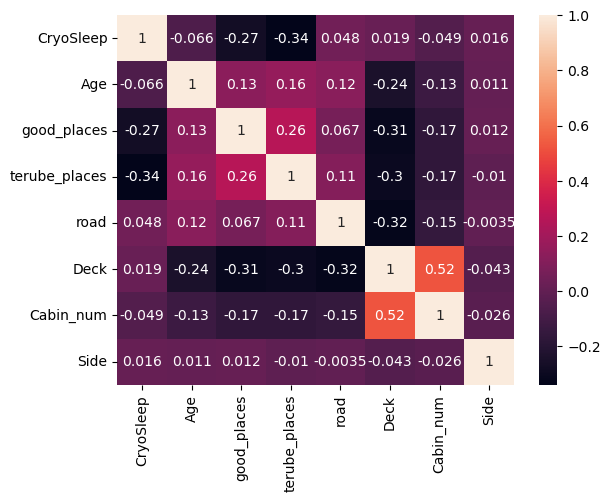

In [188]:
ax = sns.heatmap(train[['CryoSleep', 'Age','good_places','terube_places','road', 'Deck', 'Cabin_num', 'Side']].corr(), annot=True)
plt.show()

In [173]:
features = ['CryoSleep', 'Age','good_places','terube_places','road', 'Deck', 'Cabin_num', 'Side']
X = train[features]
y = train['Transported']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [175]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [176]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [177]:
y_pred = model.predict(X_test)

In [178]:
model.score(X_test,y_test)

0.7987349051178838

In [179]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7987349051178838


In [180]:
df_test = test[features]

test_pred = model.predict(df_test)

In [181]:
sample['Transported'] = test_pred
sample['Transported'] = sample['Transported'].astype(bool)

In [182]:
sample.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [183]:
sample.to_csv('submission.csv', index=False)
sample.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
